# BANDIDOS MANCOS

<img src="https://previews.123rf.com/images/stanga/stanga1608/stanga160800030/61099120-m%C3%A1quina-de-juego-de-la-m%C3%A1quina-tragaperras.jpg" width="200">
<img src="https://previews.123rf.com/images/stanga/stanga1608/stanga160800030/61099120-m%C3%A1quina-de-juego-de-la-m%C3%A1quina-tragaperras.jpg" width="200">
<img src="https://previews.123rf.com/images/stanga/stanga1608/stanga160800030/61099120-m%C3%A1quina-de-juego-de-la-m%C3%A1quina-tragaperras.jpg" width="200">
<img src="https://previews.123rf.com/images/stanga/stanga1608/stanga160800030/61099120-m%C3%A1quina-de-juego-de-la-m%C3%A1quina-tragaperras.jpg" width="200">
<img src="https://previews.123rf.com/images/stanga/stanga1608/stanga160800030/61099120-m%C3%A1quina-de-juego-de-la-m%C3%A1quina-tragaperras.jpg" width="200">


Recompensas desconcidas
¿Como encontrar cual es el mejor?

In [1]:
import random
import numpy as np

def generar_bandidos(seed):
    random.seed(seed)
    bandidos = [0.1, 0.1, 0.1, 0.1, 0.9]
    random.shuffle(bandidos)
    return(bandidos)



bandidos=generar_bandidos(1)
bandidos


[0.1, 0.1, 0.9, 0.1, 0.1]

In [2]:

def get_recompensa(bandido):
    rand = np.random.random()  # [0.0,1.0)
    reward = 1 if (rand < bandidos[bandido]) else 0
    return reward

get_recompensa(2)

1

In [3]:
ratio_exploracion = 0.5
elecciones_bandido = np.zeros(len(bandidos)) 
valores_estimados =  np.zeros(len(bandidos))


In [4]:
def elige_bandido(ratio_exploracion):
    rand = np.random.random()  # [0.0,1.0)
    if (rand < ratio_exploracion):
        bandido_explorado = np.random.randint(len(bandidos)) 
        return bandido_explorado
    else:
        bandido_explotado = np.argmax(valores_estimados)
        return bandido_explotado



In [5]:
def update(bandido, recompensa):
    elecciones_bandido[bandido] += 1
    print(f"Bandido[{bandido}] Recompensa[{recompensa}]",
          f"Estimación{np.around(np.array(valores_estimados),4)}",
          f"Elecciones{elecciones_bandido}",
          f"Delta [{np.around((recompensa - valores_estimados[bandido]),2)}/{elecciones_bandido[bandido]}]")
    valores_estimados[bandido] += ( (recompensa - valores_estimados[bandido])/elecciones_bandido[bandido]) 

Opciones:
* 1<sub>recompensa</sub> - 1<sub>valores_estimados[bandido]</sub> = 0 <sub>No cambies</sub>
* 0<sub>recompensa</sub> - 0<sub>valores_estimados[bandido]</sub> = 0 <sub>No cambies</sub>
* 1<sub>recompensa</sub> - 0<sub>valores_estimados[bandido]</sub> = 1 <sub>Aumenta el valor</sub>
* 0<sub>recompensa</sub> - 1<sub>valores_estimados[bandido]</sub> = -1 <sub>Baja el valor</sub>

## Sólo explorando
Se elige el bandido al azar cada iteración

In [6]:
ratio_exploracion = 1
elecciones_bandido = np.zeros(len(bandidos)) 
valores_estimados =  np.zeros(len(bandidos))
recompensa_final = 0
for i in range(1,1000):
    bandido=elige_bandido(ratio_exploracion)
    recompensa = get_recompensa(bandido)
    recompensa_final+=recompensa
    update(bandido,recompensa)
print(recompensa_final)
print(valores_estimados)
print( bandidos)

Bandido[3] Recompensa[0] Estimación[0. 0. 0. 0. 0.] Elecciones[0. 0. 0. 1. 0.] Delta [0.0/1.0]
Bandido[0] Recompensa[0] Estimación[0. 0. 0. 0. 0.] Elecciones[1. 0. 0. 1. 0.] Delta [0.0/1.0]
Bandido[3] Recompensa[0] Estimación[0. 0. 0. 0. 0.] Elecciones[1. 0. 0. 2. 0.] Delta [0.0/2.0]
Bandido[1] Recompensa[0] Estimación[0. 0. 0. 0. 0.] Elecciones[1. 1. 0. 2. 0.] Delta [0.0/1.0]
Bandido[4] Recompensa[0] Estimación[0. 0. 0. 0. 0.] Elecciones[1. 1. 0. 2. 1.] Delta [0.0/1.0]
Bandido[3] Recompensa[0] Estimación[0. 0. 0. 0. 0.] Elecciones[1. 1. 0. 3. 1.] Delta [0.0/3.0]
Bandido[0] Recompensa[0] Estimación[0. 0. 0. 0. 0.] Elecciones[2. 1. 0. 3. 1.] Delta [0.0/2.0]
Bandido[4] Recompensa[1] Estimación[0. 0. 0. 0. 0.] Elecciones[2. 1. 0. 3. 2.] Delta [1.0/2.0]
Bandido[0] Recompensa[0] Estimación[0.  0.  0.  0.  0.5] Elecciones[3. 1. 0. 3. 2.] Delta [0.0/3.0]
Bandido[3] Recompensa[0] Estimación[0.  0.  0.  0.  0.5] Elecciones[3. 1. 0. 4. 2.] Delta [0.0/4.0]
Bandido[1] Recompensa[0] Estimación[0.  

* La estimación de los valores sí se realiza, porque se visitan todos los bandidos.
* No se obtiene puntuación óptima porque se elige al azar constantemente.

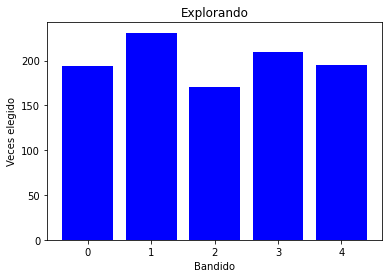

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.bar(range(0,5), elecciones_bandido,  color="blue")
ax.set_ylabel('Veces elegido')
ax.set_xlabel('Bandido')
ax.set_title('Explorando')
plt.show()

# fig = plt.gcf()
# plot_url = py.plot_mpl(fig, filename='mpl-basic-bar')

## Sólo explotando
La primera elección es la que queda

In [8]:
## Sólo explotando
ratio_exploracion = 0
elecciones_bandido = np.zeros(len(bandidos)) 
valores_estimados =  np.zeros(len(bandidos))
recompensa_final = 0
for i in range(1,100):
    bandido=elige_bandido(ratio_exploracion)
    # print('Bandido Elegido[{}]'.format(bandido),valores_estimados)
    recompensa = get_recompensa(bandido)
    recompensa_final+=recompensa
    update(bandido,recompensa)
print(recompensa_final)
print(valores_estimados)
print( bandidos)


Bandido[0] Recompensa[0] Estimación[0. 0. 0. 0. 0.] Elecciones[1. 0. 0. 0. 0.] Delta [0.0/1.0]
Bandido[0] Recompensa[1] Estimación[0. 0. 0. 0. 0.] Elecciones[2. 0. 0. 0. 0.] Delta [1.0/2.0]
Bandido[0] Recompensa[0] Estimación[0.5 0.  0.  0.  0. ] Elecciones[3. 0. 0. 0. 0.] Delta [-0.5/3.0]
Bandido[0] Recompensa[0] Estimación[0.3333 0.     0.     0.     0.    ] Elecciones[4. 0. 0. 0. 0.] Delta [-0.33/4.0]
Bandido[0] Recompensa[0] Estimación[0.25 0.   0.   0.   0.  ] Elecciones[5. 0. 0. 0. 0.] Delta [-0.25/5.0]
Bandido[0] Recompensa[0] Estimación[0.2 0.  0.  0.  0. ] Elecciones[6. 0. 0. 0. 0.] Delta [-0.2/6.0]
Bandido[0] Recompensa[0] Estimación[0.1667 0.     0.     0.     0.    ] Elecciones[7. 0. 0. 0. 0.] Delta [-0.17/7.0]
Bandido[0] Recompensa[0] Estimación[0.1429 0.     0.     0.     0.    ] Elecciones[8. 0. 0. 0. 0.] Delta [-0.14/8.0]
Bandido[0] Recompensa[0] Estimación[0.125 0.    0.    0.    0.   ] Elecciones[9. 0. 0. 0. 0.] Delta [-0.13/9.0]
Bandido[0] Recompensa[0] Estimación[0.

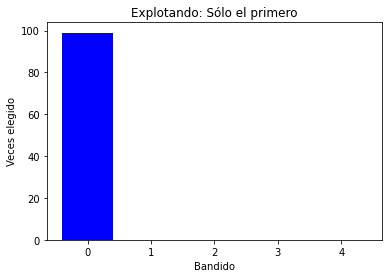

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.bar(range(0,5), elecciones_bandido,  color="blue")
ax.set_ylabel('Veces elegido')
ax.set_xlabel('Bandido')
ax.set_title('Explotando: Sólo el primero')
plt.show()

# Explorando y Explotando

In [10]:
## Sólo explotando
ratio_exploracion = 0.05
elecciones_bandido = np.zeros(len(bandidos)) 
valores_estimados =  np.zeros(len(bandidos))
recompensa_final = 0
for i in range(1,1000):
    bandido=elige_bandido(ratio_exploracion)
    recompensa = get_recompensa(bandido)
    recompensa_final+=recompensa
    update(bandido,recompensa)
print(recompensa_final)
print(valores_estimados)
print( bandidos)


Bandido[0] Recompensa[0] Estimación[0. 0. 0. 0. 0.] Elecciones[1. 0. 0. 0. 0.] Delta [0.0/1.0]
Bandido[0] Recompensa[0] Estimación[0. 0. 0. 0. 0.] Elecciones[2. 0. 0. 0. 0.] Delta [0.0/2.0]
Bandido[0] Recompensa[0] Estimación[0. 0. 0. 0. 0.] Elecciones[3. 0. 0. 0. 0.] Delta [0.0/3.0]
Bandido[0] Recompensa[0] Estimación[0. 0. 0. 0. 0.] Elecciones[4. 0. 0. 0. 0.] Delta [0.0/4.0]
Bandido[0] Recompensa[0] Estimación[0. 0. 0. 0. 0.] Elecciones[5. 0. 0. 0. 0.] Delta [0.0/5.0]
Bandido[0] Recompensa[0] Estimación[0. 0. 0. 0. 0.] Elecciones[6. 0. 0. 0. 0.] Delta [0.0/6.0]
Bandido[0] Recompensa[0] Estimación[0. 0. 0. 0. 0.] Elecciones[7. 0. 0. 0. 0.] Delta [0.0/7.0]
Bandido[0] Recompensa[0] Estimación[0. 0. 0. 0. 0.] Elecciones[8. 0. 0. 0. 0.] Delta [0.0/8.0]
Bandido[0] Recompensa[0] Estimación[0. 0. 0. 0. 0.] Elecciones[9. 0. 0. 0. 0.] Delta [0.0/9.0]
Bandido[0] Recompensa[0] Estimación[0. 0. 0. 0. 0.] Elecciones[10.  0.  0.  0.  0.] Delta [0.0/10.0]
Bandido[0] Recompensa[0] Estimación[0. 0. 0.

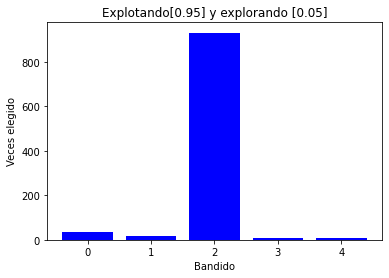

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.bar(range(0,5), elecciones_bandido,  color="blue")
ax.set_ylabel('Veces elegido')
ax.set_xlabel('Bandido')
ax.set_title('Explotando[{}] y explorando [{}]'.format(1-ratio_exploracion,ratio_exploracion))
plt.show()